In [ ]:
import sys
sys.path.append("../Transform_DLC/")
from DLCTransformer import DLCTransformer
from DLCUndistorter import DLCUndistorter

In [ ]:
video_filepath = "test_data/206_F2-63_221222_OTE_Bottom_synchronized_downsampled80fps.mp4"
intrinsic_camera_calibration_filepath = "test_data/Bottom.p"
config_filepath = r"test_data/config.yaml"
dlc_filepath = r"test_data/206_F2-63_221222_OTE_Bottom_downsampled80fps_synchronized.h5"
cropping = {"offset_col_idx": 20, "offset_row_idx": 292}

In [ ]:
undistorter = DLCUndistorter(dlc_filepath=dlc_filepath, intrinsic_camera_calibration_filepath=intrinsic_camera_calibration_filepath, video_filepath=video_filepath, fisheye=True, cropping=cropping)

In [ ]:
undistorted = undistorter.run()

/Users/kobel/github_repos/Undistort_DLC/DLCUndistorter.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  xy, likelihood = undistort_points(self.dlc_df.loc[:, (scorer, bp)], camera_parameters_for_undistortion, self.fisheye)
/Users/kobel/github_repos/Undistort_DLC/DLCUndistorter.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  xy, likelihood = undistort_points(self.dlc_df.loc[:, (scorer, bp)], camera_parameters_for_undistortion, self.fisheye)
/Users/kobel/github_repos/Undistort_DLC/DLCUndistorter.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  xy, likelihood = undistort_points(self.dlc_df.loc[:, (scorer, bp)], camera_parameters_for_undistortion, self.fisheye)
/Users/kobel/github_repos/Undistort_DLC/DLCUndistorter.py:84: PerformanceWarning: indexing past lexsort depth may impact performance.
  xy, likelihood = undistort_points(self.dlc_df.loc[:, (scorer, bp)], camera_parameters_for_undistortion

In [ ]:
transformer = DLCTransformer(dlc_df=undistorted, config_filepath=config_filepath)

In [ ]:
scaled = transformer.run()

Angle between basis vectors : 82.72766068555808


In [ ]:
scaled.head()

scorer    DLC_resnet50_OT_BottomCam_finalSep20shuffle1_1030000             \
bodyparts                                                 LED5              
coords                                                       x          y   
0                                                   5.677880   -27.434284   
1                                                   5.682081   -27.445869   
2                                                   5.675895   -27.427298   
3                                                   5.680007   -27.433445   
4                                                   5.711834   -27.400876   

scorer                                                                   \
bodyparts             TailBase                        TailEnd             
coords    likelihood         x         y likelihood         x         y   
0           0.999902  0.929519  1.562231   0.999358  1.184120  4.773579   
1           0.999885  0.939334  1.561882   0.999440  1.182064  4.753184   
2           0.999908  0.949961  1.589927   0.999186  1.183951  4.773595   
3           0.999902  0.937500  1.601257   0.999153  1.181186  4.787392   
4           0.999887  0.917990  1.616717   0.999437  1.172536  4.799319   

scorer                          ...                                          \
bodyparts            TaiMiddle  ... MazeCornerOpenLeft MazeCornerClosedLeft   
coords    likelihood         x  ...         likelihood                    x   
0           0.221557  0.550409  ...           0.999559             0.009040   
1           0.249403  0.551601  ...           0.999541             0.019094   
2           0.292905  0.544947  ...           0.999543             0.007530   
3           0.256076  5.201339  ...           0.999547             0.010311   
4           0.215514  0.522462  ...           0.999566             0.016455   

scorer                                                                   \
bodyparts                      MazeCornerOpenRight                        
coords            y likelihood                   x         y likelihood   
0          4.967942   0.965002           50.102578  0.167046   0.998118   
1          4.973620   0.968089           50.085476  0.179067   0.998101   
2          4.977844   0.962404           50.083631  0.174767   0.998084   
3          4.971684   0.959816           50.109286  0.184130   0.998079   
4          4.992711   0.949479           50.120214  0.183078   0.998119   

scorer                                                
bodyparts MazeCornerClosedRight                       
coords                        x         y likelihood  
0                     -0.024975  0.037418   0.998658  
1                     -0.008466  0.021435   0.998722  
2                     -0.023450  0.049675   0.998707  
3                     -0.019348  0.044803   0.998434  
4                     -0.027551  0.014754   0.998458  

[5 rows x 96 columns]

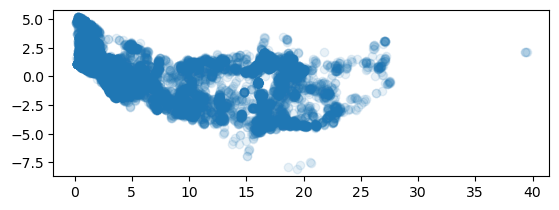

In [ ]:
import matplotlib.pyplot as plt
scorer = scaled.columns.levels[0]
scatter_bp = "Snout"
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.scatter(scaled.loc[:, (scorer, scatter_bp, "x")], scaled.loc[:, (scorer, scatter_bp, "y")], alpha=0.1)
plt.show()

Angle between basis vectors : 86.68772961925883


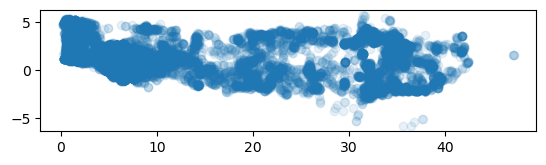

In [ ]:
transformer = DLCTransformer(dlc_filepath=dlc_filepath, config_filepath=config_filepath)
scaled = transformer.run()


scorer = scaled.columns.levels[0]
scatter_bp = "Snout"
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.scatter(scaled.loc[:, (scorer, scatter_bp, "x")], scaled.loc[:, (scorer, scatter_bp, "y")], alpha=0.1)
plt.show()